In [79]:
#multilpe parameters
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import pandas as pd

In [80]:
# Step 1 : generate data

X,y = make_regression(n_samples=500,n_features=10,noise=25 , random_state=0)
print(X.shape , y.shape)
n_features = X.shape[1]

(500, 10) (500,)


In [81]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,-1.616956,0.640132,-0.369182,-0.239379,-0.738031,-0.024326,1.099660,0.279925,-0.098150,0.655264
1,0.967446,-1.226622,-0.817493,-1.401347,-0.263937,-0.055353,1.030438,0.352817,-0.152774,-2.047324
2,0.802456,-0.268003,1.867559,0.906045,-0.155010,0.947252,-0.861226,0.614079,0.922207,1.910065
3,-0.977278,1.867558,1.764052,0.400157,-0.151357,0.950088,0.978738,-0.103219,0.410599,2.240893
4,-0.171546,0.523277,-1.292857,0.267051,0.823504,0.771791,-0.039283,2.163236,1.336528,-1.168093


In [82]:
#step 2 : normalise the data
def normalise(X):
  u= X.mean(axis=0)
  std = X.std(axis=0)
  X_norm = (X-u)/std
  return X_norm

In [83]:
normalise(X)
pd.DataFrame(X).head()
X.std(axis=0)

array([0.98390394, 1.00209533, 0.99304481, 0.95362204, 1.01860381,
       0.91807952, 0.99277996, 1.02029591, 0.96972094, 0.98536712])

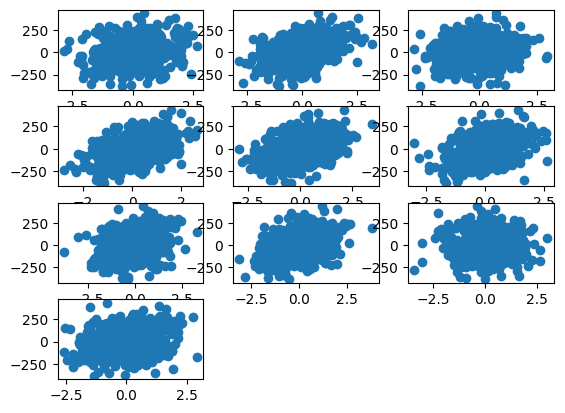

In [84]:
#Visualise y as function of each feature
for f in range(0,10):
  plt.subplot(4,3,f+1)
  plt.scatter(X[:,f] , y)

plt.show()

In [85]:
#Train Test data
XT , Xt, yT, yt = train_test_split(X,y,test_size=0.3,shuffle=False, random_state=0)
print(XT.shape , yT.shape)
print(Xt.shape , yt.shape)

(350, 10) (350,)
(150, 10) (150,)


In [86]:
#preprocess X adding a column of 1 on it
def preprocess(X):
  if X.shape[1]==n_features:
     m=X.shape[0]
     one=np.ones((m,1))
     X=np.hstack((one,X))
  return X
X=preprocess(X)
XT=preprocess(XT)
Xt=preprocess(Xt)


In [87]:
#hypothesis function
def hypothesis (X,theta):
  return np.dot(X,theta)

In [88]:
#Loss function
def loss(X,y,theta):
  yp=hypothesis(X,theta)
  error=np.mean((y-yp)**2)
  return error

In [89]:
#gradient

def gradient(X,y,theta):
  m=X.shape[0]
  yp=hypothesis(X,theta)
  grad=np.dot(X.T,(yp-y))
  return grad/m

In [90]:
#Traning the model
def train(X,y,learning_rate=0.1 , max_iterater=100):
  n=X.shape[1]
  theta=np.zeros((n))
  error_list=[]
  for i in range(max_iterater):
    error_list.append(loss(X,y,theta))
    grad=gradient(X,y,theta)
    theta=theta-learning_rate*grad
    plt.plot(error_list)
  return theta

[-2.02618568 29.6740938  59.38408714 11.86289942 66.40368987 54.89035249
 52.64137307 41.7613686  55.35847758  3.18518922 26.50405351]


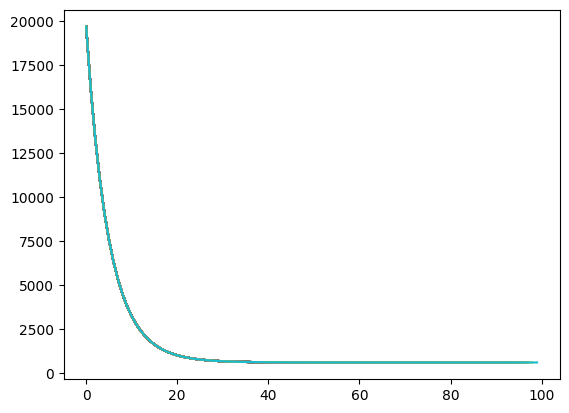

In [91]:
theta=train(XT,yT)
print(theta)

In [92]:
print(theta.shape)

(11,)


In [93]:
def predic(X,theta):
  return hypothesis(X,theta)

In [94]:
predication=predic(Xt,theta)

In [95]:
#checking how accurate our model is
def r2Score(y,y_pred):
  mean_y=np.mean(y)
  num=np.sum((y-y_pred)**2)
  den=np.sum((y-mean_y)**2)
  score=1-(num/den)
  return score

In [96]:
r2Score(yt,predication)

0.970035560492667